In [1]:
!pip install mysql-connector-python pandas matplotlib


  Using cached mysql_connector_python-9.4.0-cp312-cp312-win_amd64.whl.metadata (7.7 kB)
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 4.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.4 MB 6.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/16.4 MB 6.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.4 MB 2.5 MB/s eta 0:00:06
   --------- ------------------------------ 3.9/16.4 MB 3.9 MB/s eta 0:00:04
   ------------- -------------------------- 5.5/16.4 MB 4.7 MB/s eta 0:00:03
   -------------- ------------------------- 6.0/16.4 MB 4.4 MB/s eta 0:00:03
   --------------- ------------------------ 6.6/16.4 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.4 MB 3.8 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.4 MB 3.7 MB/s eta 0:00:03
  

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


conn = mysql.connector.connect(
    host="localhost",     
    user="root",           
    password="ujwal@2003"
    database="sales_db"     
)


In [4]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


df = pd.read_sql(query, conn)

print(df)


    product  total_qty   revenue
0    Laptop        4.0  200000.0
1     Mouse       15.0    7500.0
2  Keyboard        5.0    7500.0
3   Monitor        2.0   24000.0


C:\Users\Jagdish\AppData\Local\Temp\ipykernel_4612\749380144.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


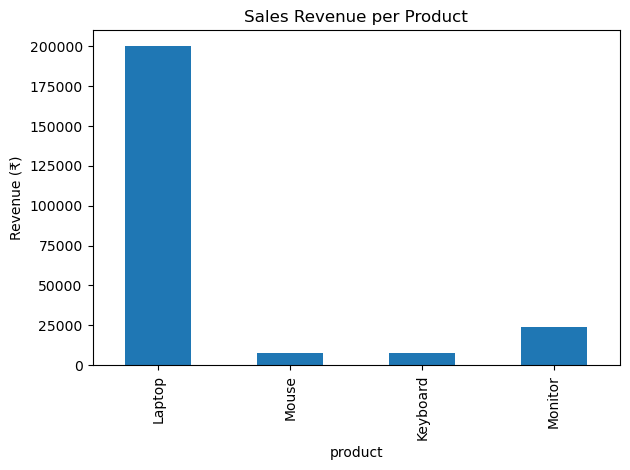

In [5]:
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.ylabel("Revenue (₹)")
plt.title("Sales Revenue per Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [7]:
conn.close()
